In [1]:
from Population import Population
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display

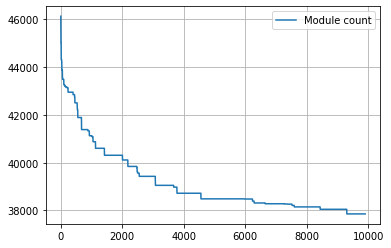

100%|██████████| 10000/10000 [10:38<00:00, 15.65it/s]


In [3]:
popSize = 100
iterCount = 10000
mutationProb = 0.1
crossProb = 0.8
modularity = 1
pathCount = 0

population = Population(popSize, pathCount)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

Pierwsze uruchomienie algorytmu, rozeznanie ile czasu zajmuje wykonanie z arbitralnie dobranymi parametrami. Widać, że algorytm jak najbardziej jest w stanie minimalizowac zadaną funkcję celu. W następnym kroku dobrane zostaną parametry. Przy strojeniu paramertów będzie używana pełna dezagregacja, ponieważ jest to najcięzszy przypadek dla podanego zadania. Dobieranie parametrów zostanie uproszczone, poprzez założenie, że parametry są od siebie niezależne.

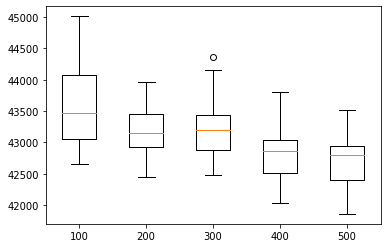

In [14]:
iterCount = 100
mutationProb = 0.1
crossProb = 0.8
modularity = 1
pathCount = 0
results = list()
labels = list()

for popSize in range(100, 600, 100):
    moduleCount = list()
    labels.append(popSize)
    for iter in tqdm(range(20)):
        population = Population(popSize, pathCount)
        result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
        moduleCount.append(result)
    results.append(moduleCount)
    display.clear_output()
    plt.boxplot(results, labels = labels)
    plt.show()

Wykres porzedstawia zależność wielkości populacji od ilości modułów. Dla każdego rozmiaru populacji wyniki były zbierane 20 razy i przedstawiane jako boxplot. Z wykresów można wyczytać, iż zwiększanie wielkości populacji powyżej 400 nie powoduje większej zmiany w prędkości oraz powtarzalności znajdowanych rozwiązań.

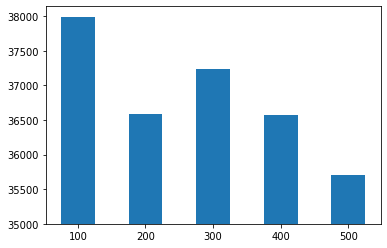

100%|██████████| 5/5 [2:32:28<00:00, 1829.78s/it]


In [27]:
iterCount = 10000
mutationProb = 0.1
crossProb = 0.8
modularity = 1
pathCount = 0
results = list()
labels = list()

for popSize in tqdm(range(100, 600, 100)):
    labels.append(popSize)
    population = Population(popSize, pathCount)
    result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
    results.append(result - 35000)
    display.clear_output()
    plt.bar(labels, height = results, width = 50, bottom = 35000)
    plt.show()

Test głębokości znalezionego optimum w zależności od wielkości populacji. Ze względu na zbyt długie obliczenia, test będzie przeprowadzany raz dla danej wielkości populacji. Poszukujemy znacznych różnic w głębokości. Z obu wykresów wynika, że populacja licząca powyżej 200 osobników nie zwiększa znacząco jakości działania algorytmu. Najważniejszy przeskok wsytępuje pomiędzy wartościami 100 a 200. Dodatkowo Wygląda na to że wielkość populacji na pozimie 200 jest optymanna, gdyż daje zbliżone rezultaty do wartości większych, jednocześnie zajmując mniej czasu na obliczenie wyniku.

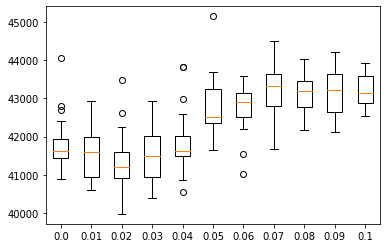

In [31]:
popSize = 200
iterCount = 100
crossProb = 0.8
modularity = 1
pathCount = 0
results = list()
labels = list()
values = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

for mutationProb in values:
    moduleCount = list()
    labels.append(mutationProb)
    for iter in tqdm(range(20)):
        population = Population(popSize, pathCount)
        result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
        moduleCount.append(result)
    results.append(moduleCount)
    display.clear_output()
    plt.boxplot(results, labels = labels)
    plt.show()

Najlepszą wartością mutacji jest 2%.

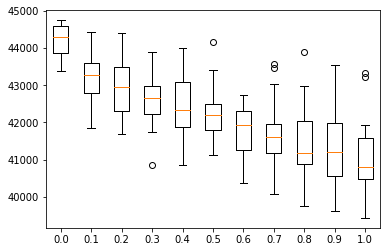

In [36]:
popSize = 200
iterCount = 100
mutationProb = 0.02
modularity = 1
pathCount = 0
results = list()
labels = list()
values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


for crossProb in values:
    moduleCount = list()
    labels.append(crossProb)
    for iter in tqdm(range(20)):
        population = Population(popSize, pathCount)
        result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
        moduleCount.append(result)
    results.append(moduleCount)
    display.clear_output()
    plt.boxplot(results, labels = labels)
    plt.show()

Najlepsza wartość krzyżowania to 100%

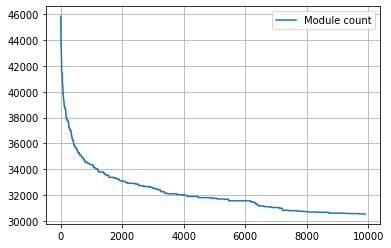

100%|██████████| 10000/10000 [47:51<00:00,  3.48it/s]


In [37]:
popSize = 500
iterCount = 10000
mutationProb = 0.02
crossProb = 1.0
modularity = 1
pathCount = 0

population = Population(popSize, pathCount)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

Widzimy, że algorytm zaczął dużo lepiej optymalizować funkcję celu. W następnej iteracji będę starał się sprawdzić, czy niestandardowe parametry nie będą lepiej działać w przypadku tego algorytmu.

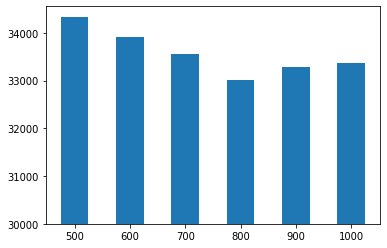

100%|██████████| 6/6 [42:50<00:00, 428.46s/it]


In [41]:
iterCount = 1000
mutationProb = 0.02
crossProb = 1.0
modularity = 1
pathCount = 0
results = list()
labels = list()

for popSize in tqdm(range(500, 1100, 100)):
    labels.append(popSize)
    population = Population(popSize, pathCount)
    result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
    results.append(result - 30000)
    display.clear_output()
    plt.bar(labels, height = results, width = 50, bottom = 30000)
    plt.show()

Z powyższego wykresu widać, że optymalną wielkością populacji jest 800 osobników.

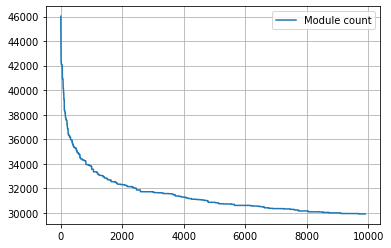

100%|██████████| 10000/10000 [1:16:34<00:00,  2.18it/s]


In [50]:
popSize = 800
iterCount = 10000
mutationProb = 0.02
crossProb = 1.0
modularity = 1
pathCount = 0

population = Population(popSize, pathCount)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

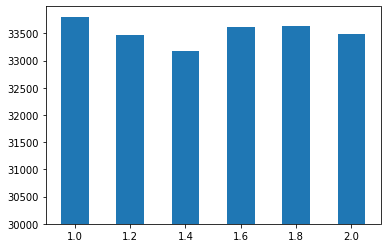

100%|██████████| 6/6 [45:06<00:00, 451.13s/it]


In [6]:
popSize = 800
iterCount = 1000
mutationProb = 0.02
modularity = 1
pathCount = 0
results = list()
labels = list()
values = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

for crossProb in tqdm(values):
    labels.append(crossProb)
    population = Population(popSize, False)
    result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
    results.append(result - 30000)
    display.clear_output()
    plt.bar(labels, height = results, width = 0.1, bottom = 30000)
    plt.show()

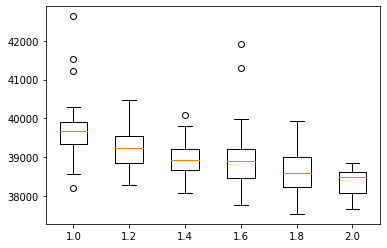

In [7]:
popSize = 800
iterCount = 100
mutationProb = 0.02
modularity = 1
results = list()
labels = list()
values = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


for crossProb in values:
    moduleCount = list()
    labels.append(crossProb)
    for iter in tqdm(range(20)):
        population = Population(popSize, False)
        result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
        moduleCount.append(result)
    results.append(moduleCount)
    display.clear_output()
    plt.boxplot(results, labels = labels)
    plt.show()

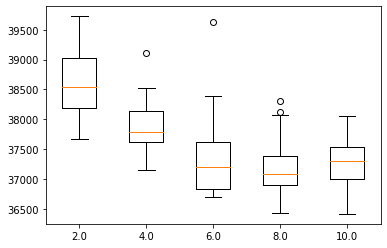

In [8]:
popSize = 800
iterCount = 100
mutationProb = 0.02
modularity = 1
results = list()
labels = list()
values = [2.0, 4.0, 6.0, 8.0, 10.0]


for crossProb in values:
    moduleCount = list()
    labels.append(crossProb)
    for iter in tqdm(range(20)):
        population = Population(popSize, False)
        result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
        moduleCount.append(result)
    results.append(moduleCount)
    display.clear_output()
    plt.boxplot(results, labels = labels)
    plt.show()

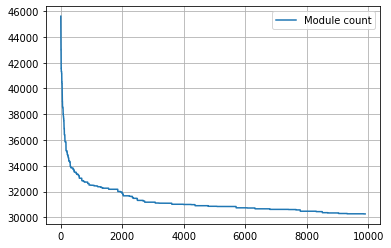

100%|██████████| 10000/10000 [1:23:26<00:00,  2.00it/s]


In [9]:
popSize = 800
iterCount = 10000
mutationProb = 0.02
crossProb = 8.0
modularity = 1
pathCount = 0

population = Population(popSize, pathCount)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

Test dla agregacji

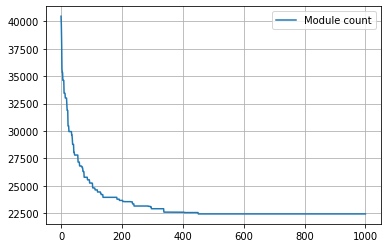

 10%|█         | 1003/10000 [08:19<1:16:20,  1.96it/s]

In [2]:
popSize = 800
iterCount = 10000
mutationProb = 0.02
crossProb = 8.0
modularity = 1

population = Population(popSize, True)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

Test dla modularnosci wiekszej od 1 (brak agregacji)

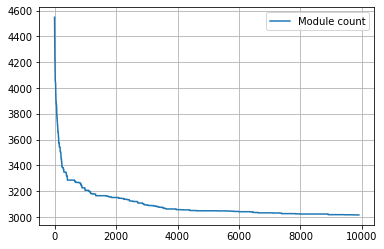

100%|██████████| 10000/10000 [1:23:21<00:00,  2.00it/s]


In [3]:
popSize = 800
iterCount = 10000
mutationProb = 0.02
crossProb = 8.0
modularity = 10

population = Population(popSize, False)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

Test dla modularności dużo większej niż 1

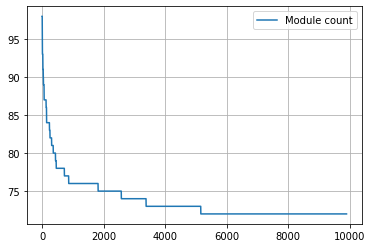

100%|██████████| 10000/10000 [1:23:05<00:00,  2.01it/s]


In [4]:
popSize = 800
iterCount = 10000
mutationProb = 0.02
crossProb = 8.0
modularity = 500

population = Population(popSize, False)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label = 'Module count')
        plt.legend()
        plt.grid()
        plt.show()